In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assuming your data is in a CSV file
df = pd.read_csv('/content/loan.csv')

In [4]:
# Basic statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())

       applicant_id  Months_loan_taken_for  Principal_loan_amount  \
count  1.000000e+03            1000.000000           1.000000e+03   
mean   1.514763e+06              20.903000           3.271258e+06   
std    2.286764e+05              12.058814           2.822737e+06   
min    1.105364e+06               4.000000           2.500000e+05   
25%    1.321398e+06              12.000000           1.365500e+06   
50%    1.529114e+06              18.000000           2.319500e+06   
75%    1.707752e+06              24.000000           3.972250e+06   
max    1.903505e+06              72.000000           1.842400e+07   

       EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
count                                  1000.000000      1000.000000   
mean                                      2.973000         0.041000   
std                                       1.118715         0.198389   
min                                       1.000000         0.000000   
25%                    

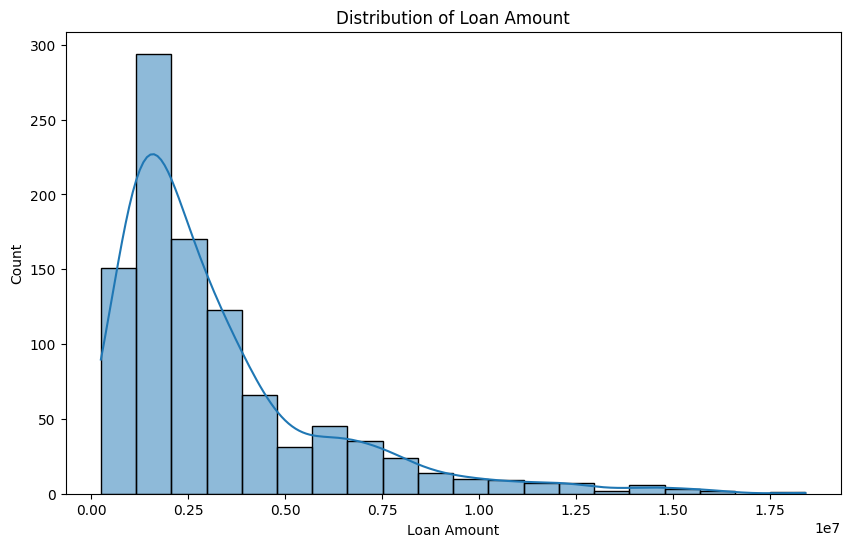

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Principal_loan_amount'], bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

In [8]:
# Display the first few rows
print(df.head())

# Check the data types and missing values
print(df.info())

# Summary statistics
print(df.describe())


                    loan_application_id  applicant_id  Months_loan_taken_for  \
0  d68d975e-edad-11ea-8761-1d6f9c1ff461       1469590                      6   
1  d68d989e-edad-11ea-b1d5-2bcf65006448       1203873                     48   
2  d68d995c-edad-11ea-814a-1b6716782575       1432761                     12   
3  d68d99fc-edad-11ea-8841-17e8848060ae       1207582                     42   
4  d68d9a92-edad-11ea-9f3d-1f8682db006a       1674436                     24   

                Purpose  Principal_loan_amount  \
0  electronic equipment                1169000   
1  electronic equipment                5951000   
2             education                2096000   
3                  FF&E                7882000   
4           new vehicle                4870000   

   EMI_rate_in_percentage_of_disposable_income  \
0                                            4   
1                                            2   
2                                            2   
3                 

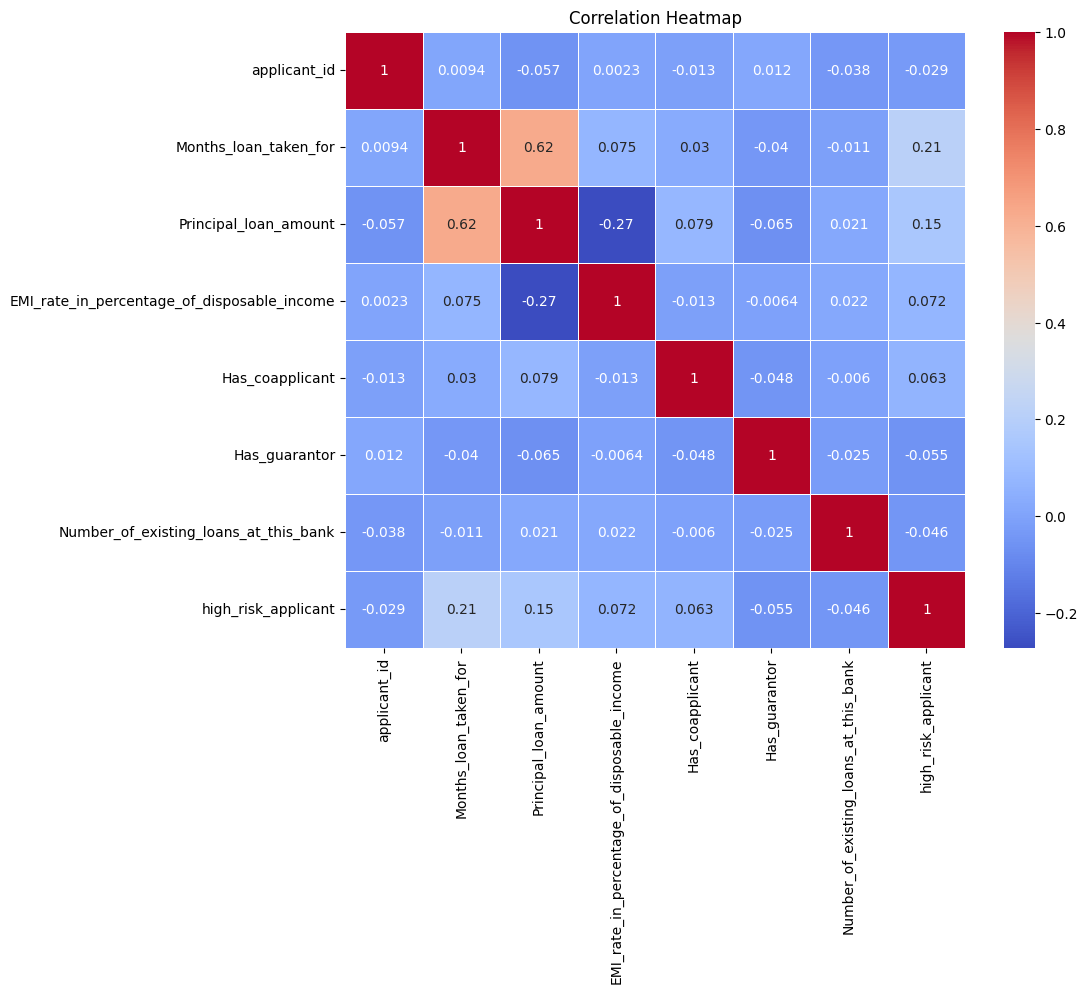

In [10]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with median or mode)
df['Months_loan_taken_for'].fillna(df['Months_loan_taken_for'].median(), inplace=True)
df['Purpose'].fillna(df['Purpose'].mode()[0], inplace=True)

# Convert data types if necessary
df['applicant_id'] = df['applicant_id'].astype(str)


loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64


In [15]:
print(df.columns)

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


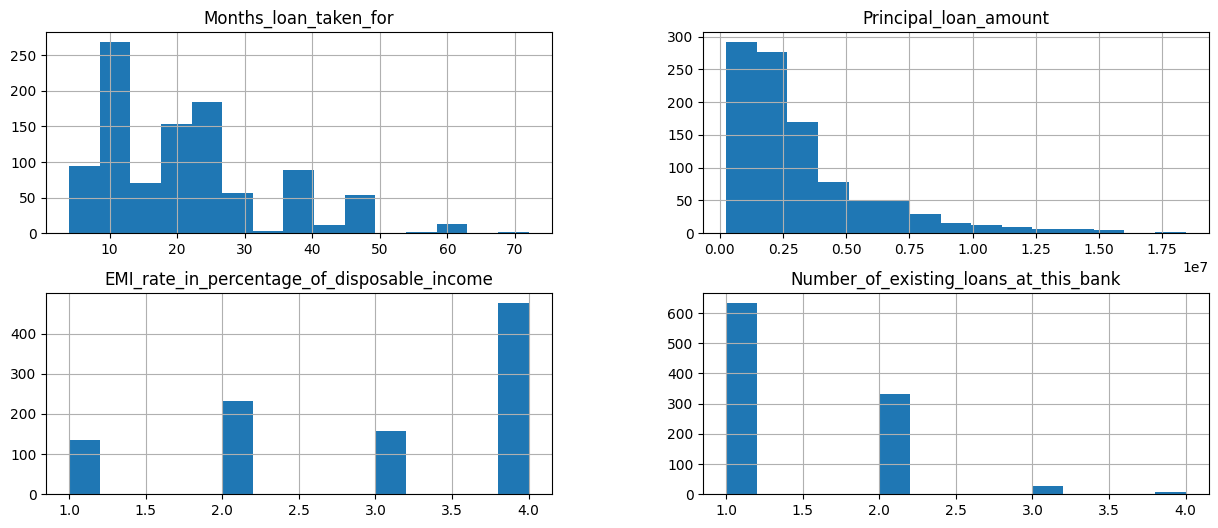

In [19]:
# Distribution of numeric features
numeric_features = ['Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Number_of_existing_loans_at_this_bank']
df[numeric_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

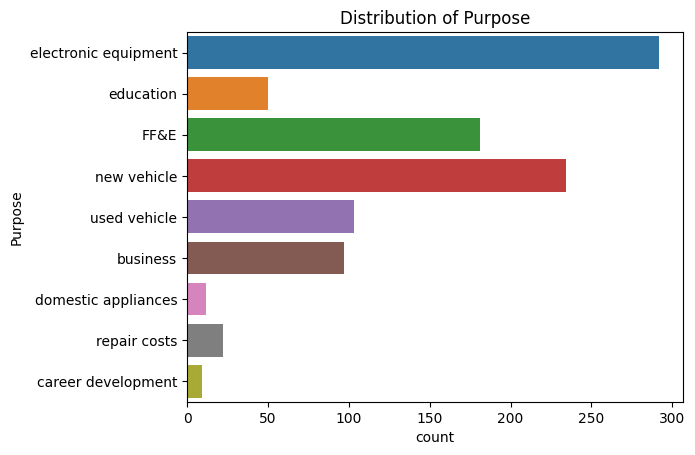

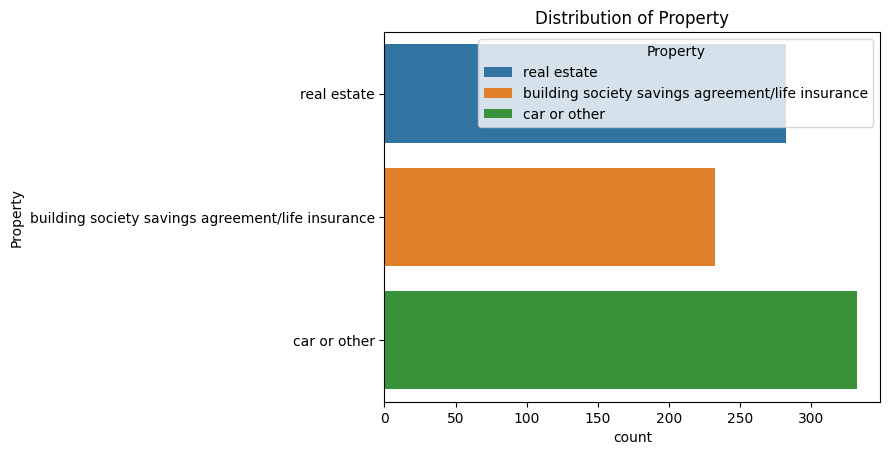

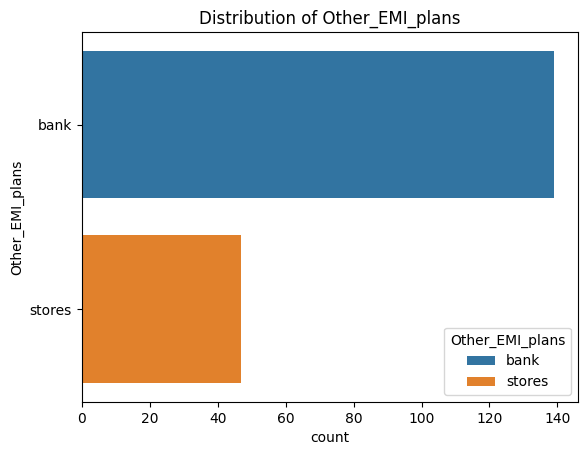

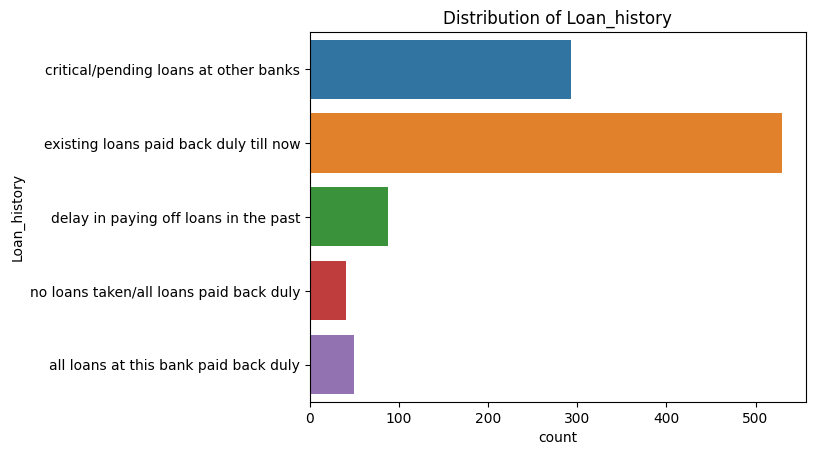

In [25]:
# Distribution of categorical features
categorical_features = ['Purpose', 'Property', 'Other_EMI_plans', 'Loan_history']
for feature in categorical_features:
    sns.countplot(y=feature, hue=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

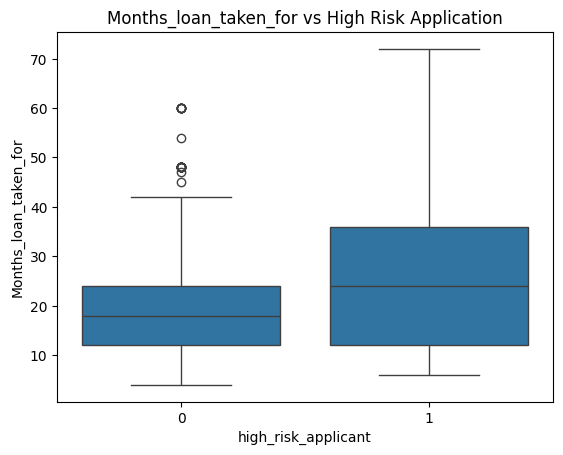

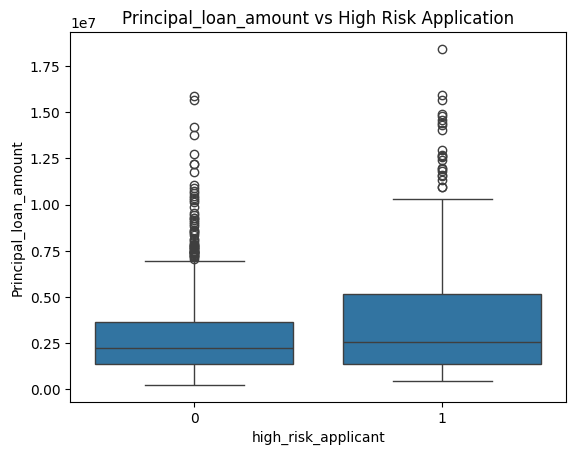

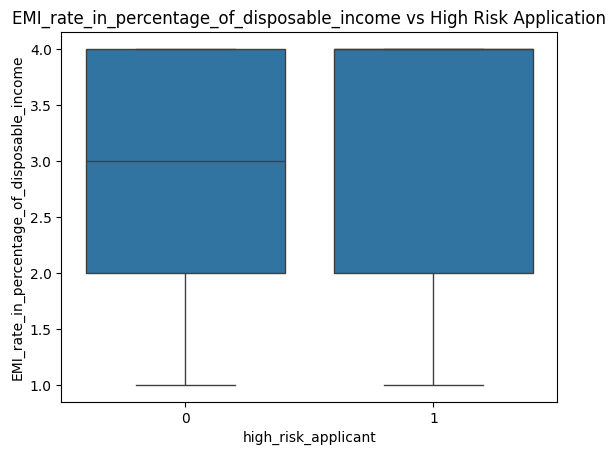

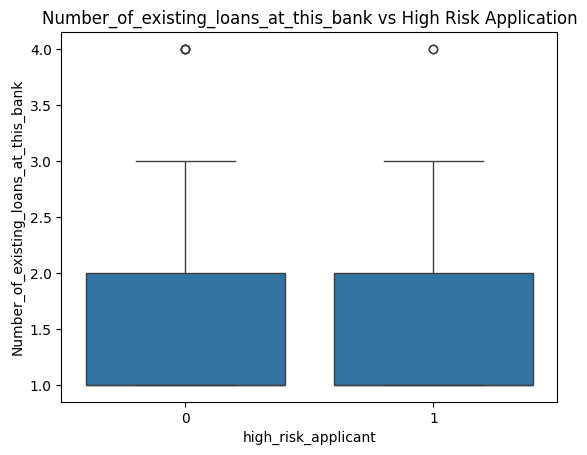

In [21]:
# Relationship between numeric features and target
for feature in numeric_features:
    sns.boxplot(x='high_risk_applicant', y=feature, data=df)
    plt.title(f'{feature} vs High Risk Application')
    plt.show()


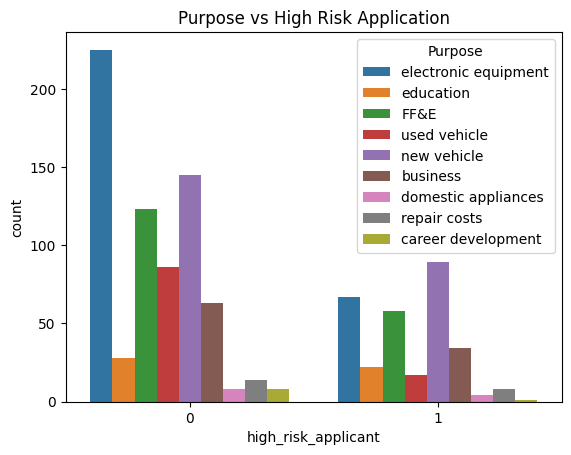

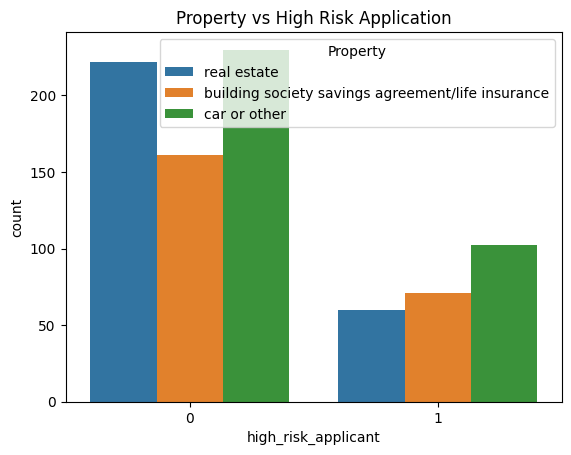

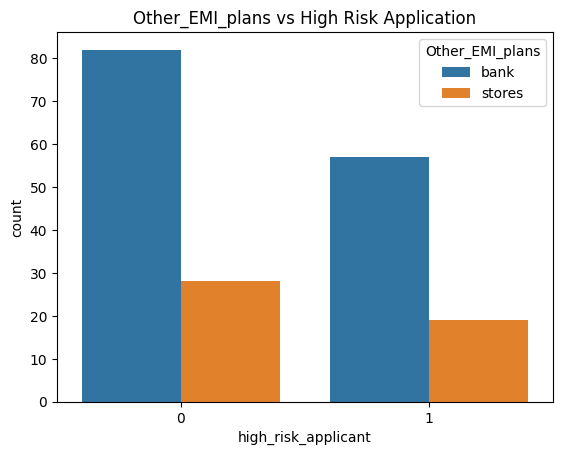

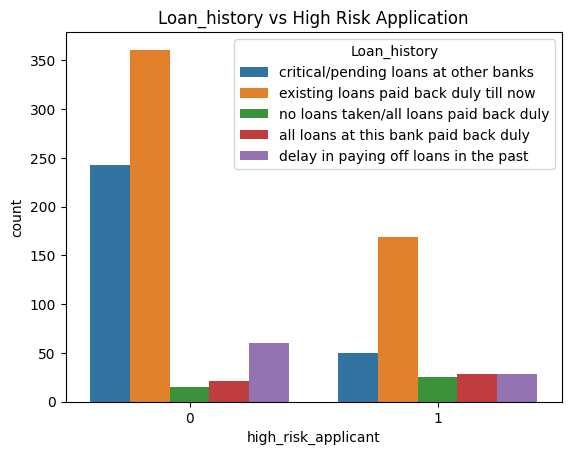

In [22]:
# Relationship between categorical features and target
for feature in categorical_features:
    sns.countplot(x='high_risk_applicant', hue=feature, data=df)
    plt.title(f'{feature} vs High Risk Application')
    plt.show()

<ipython-input-23-650c0854a1dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='high_risk_applicant', data=df, palette='viridis')


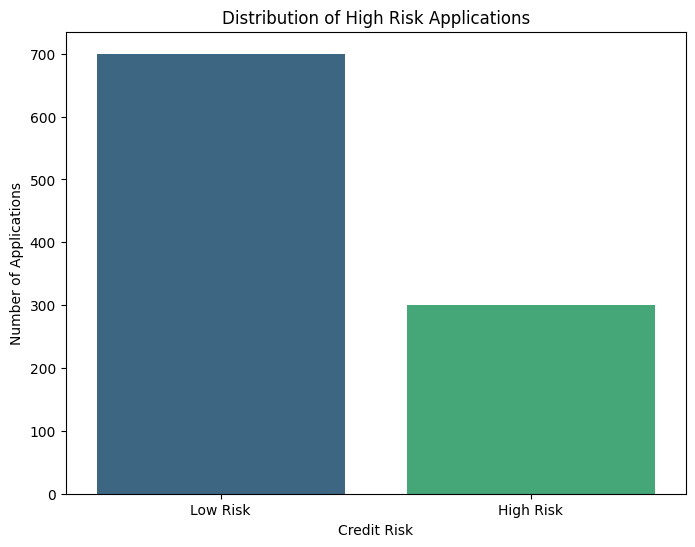

In [23]:
# Plot the distribution of high-risk applications
plt.figure(figsize=(8, 6))
sns.countplot(x='high_risk_applicant', data=df, palette='viridis')
plt.title('Distribution of High Risk Applications')
plt.xlabel('Credit Risk')
plt.ylabel('Number of Applications')
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.show()